In [1]:
include("/Users/gr_1/Documents/IsoFlex/IsoFlex.jl")
using Plots

In [2]:
W = zeros(1000,1000)
W[:,500-25:500+25] .= 2e6/50
I = IsoFlex.flexural(W, Nx = 0, Ny = 0, Nxy = 0, dx=1000, dy=1000, Te = 30e3, ncores=6);


In [3]:
w_line1 = I[500,:];

## Analytic solution comparisons
#### Basic line load - no in-plane stress


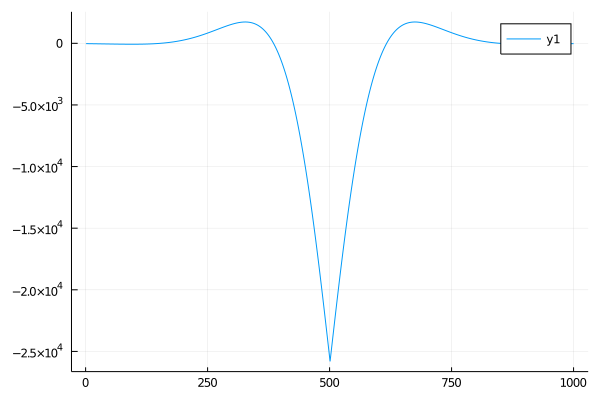

In [48]:
pm = 3300
pc = 2750
Te = 30000
v = .25
Nx = -100e12
E = 100e9
g = 9.81
D0 = E * Te^3 / (12 * (1 - v ^ 2))
dRho = pm-pc
V0 = 2e6 * 2750* 9.81 * 1000 #* 3300/(3300-2750) #(3300/(3300-2750)) #load .1e6 meter * density 2750 *  g * 1000m (x-)

beta =  ((3300 * g / (4*D0)) ^ .5 + (Nx / (4*D0))) ^ -.5
gamma = ((3300 * g / (4*D0)) ^ .5 - (Nx / (4*D0))) ^ -.5
alpha = (4 * D0 / (3300 * g)) ^ .25

we = V0 / (2 * alpha^2 * 3300 * g) 
wl = V0 * alpha^3 / (7 * D0 )

x = float(collect(-1e6/2:1000:1e6/2-1000))
w0 = real(wl * exp.( - abs.(x) ./ alpha ) .* ( cos.( x ./ alpha ) .+ sin.(abs.(x) ./ alpha) ));
w = real(we * exp.( .- abs.(x) ./ beta ) .* ( beta .* cos.( x ./ gamma ) .+ gamma .* sin.(abs.(x) ./ gamma) )); #(eq. 13, garcia sandwell 2013)
w_crack = real(-2 .* wl .* exp.(.-abs.(x) ./ alpha) .* cos.(x/alpha))
plot(w_crack)

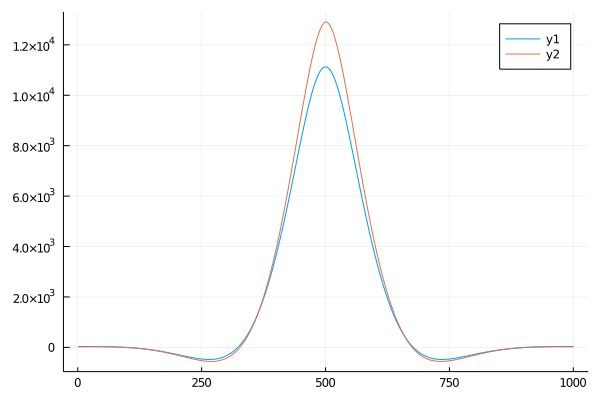

In [5]:
#plot(w0)
plot(w_line1)
plot!(w0)

## In - plane 

In [6]:
 W = zeros(1000,1000)
 W[:,500] .= 2e6
# I = IsoFlex.flexural(W, Nx = 000 * 2750 * .1e6 * 9.81*30, Ny = 0, Nxy = 1000*2750*.1e6 * 9.81 * 100, dx=1000, dy=1000, Te = 100e3, ncores=6);
# w_line = I[2500,:];
I = IsoFlex.flexural(W, Nx = -0e12, Ny = 0, Nxy = 0, dx=1000, dy=1000, Te = 25e3, ncores=6);
w_line2 = I[500,:];
I = IsoFlex.flexural(W, Nx = -100e12, Ny = 0, Nxy = 0, dx=1000, dy=1000, Te = 25e3, ncores=6);
w_line1 = I[500,:];




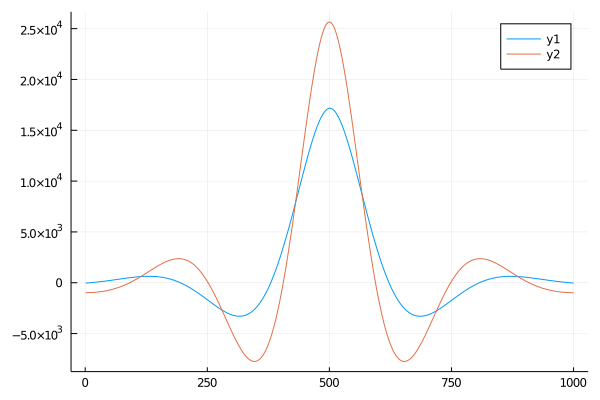

In [7]:
plot(w)
plot!(w_line1)
#plot(w_line0, xlabel = "km", ylabel="m",label="N=10^15")

#plot(w_line1 - w_line2, xlabel = "km", ylabel="m",label="N=10^12")
#plot!(w_line2, xlabel = "km", ylabel="m",label="N=0")
#plot!(, xlabel = "km", ylabel="m",label="N=10^12")
#title

## Variable Te

In [78]:
Te = zeros(size(ero)) .+ 30e3

Te[:,430:570] .= 100.0

I = IsoFlex.flexural(W, Nx = 0, Ny = 0, Nxy = 0, dx=1000, dy=1000, Te =Te, ncores=6, Te0 = 50e3);





1100.2215725962633
783.8804718734136
604.3361077725694
491.3984151883051
413.9751631772906
357.8729718381637
315.70322093383766
283.2128709575409
257.7285956736723
237.45424894608186
221.12573759398947
207.82517400986217
196.87171845038574
187.75274738929875
180.07753940694784
173.5458943401445
167.92510781575947
163.03372029552338
158.729556926668
154.9003224902899
151.45724160062673
148.329631458957
145.4614603276932
142.80730795371346
140.33115643378187
138.00398096986828
135.80216058604856
133.7067279437506
131.70239417249104
129.77649425851268
127.9187583768944
126.1210672729976
124.37644200805516
122.6792926779708
121.02500492761465
119.40979058216544
117.830247963906
116.2841338776525
114.76885300035792
113.28253511052753
111.82382316150324
110.39121305441586
108.98345650597184
107.59954786019443
106.23867319122655
104.90013287965485
103.58307660810533
102.28688605672869
101.01100098867028
99.75491247299942
98.51817084627328
97.30046860031143
96.10125358566074
94.92014848516556


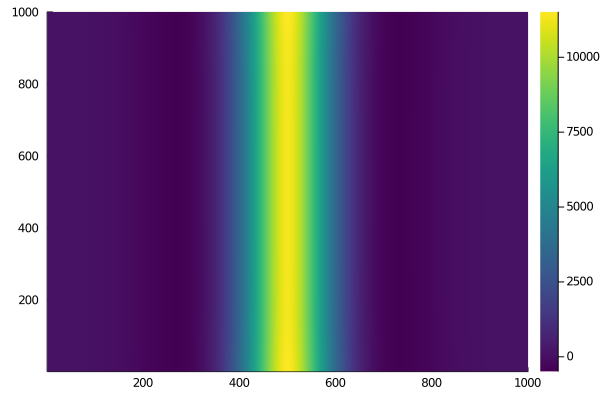

In [69]:
heatmap(w,c = :viridis)

In [80]:
w_line1 = I[500,:];

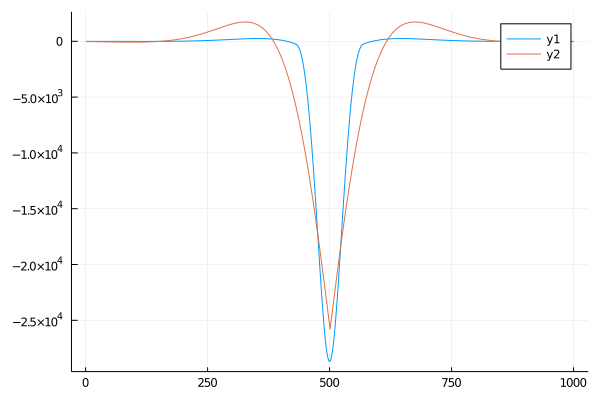

In [81]:
plot(-w_line1)
plot!(w_crack)